<a href="https://colab.research.google.com/github/cheth-dev/Mainflow_internship/blob/main/SALES_TASK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns


# Load dataset
df = pd.read_csv("/content/sales_data.csv")

df.head()





,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [ ]:
# 1. Data Exploration
print("Dataset Shape:", df.shape)
print("Column Info:")
print(df.info())
print("Missing Values:")
print(df.isnull().sum())


Dataset Shape: (113036, 18)
Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 1

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

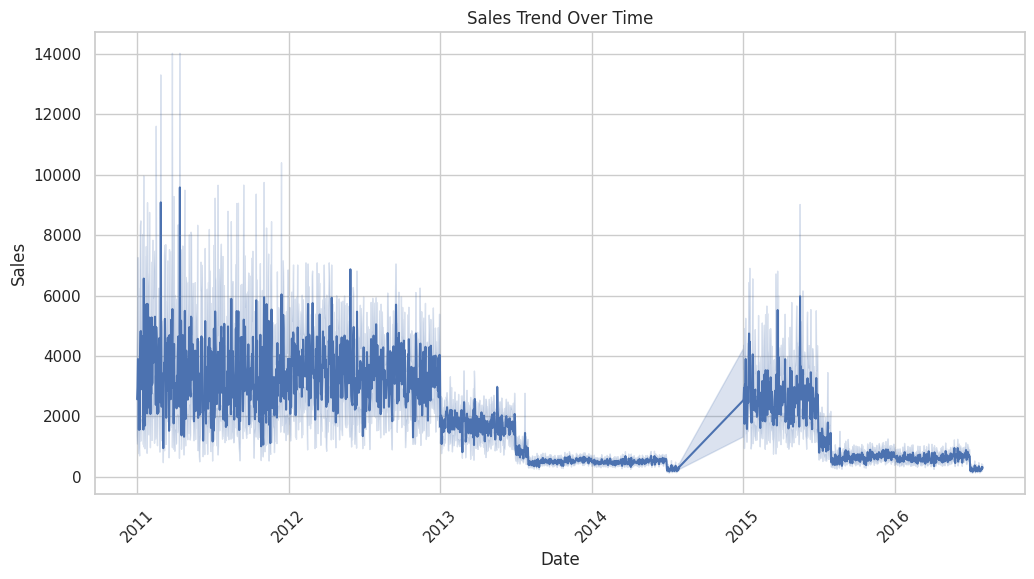

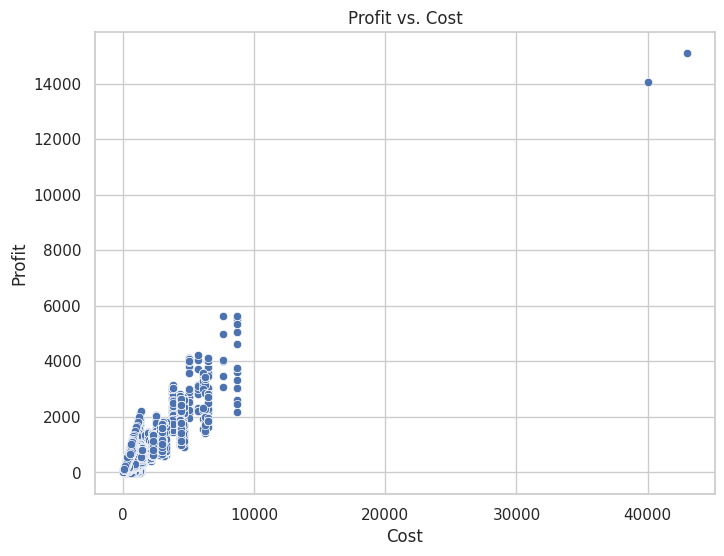

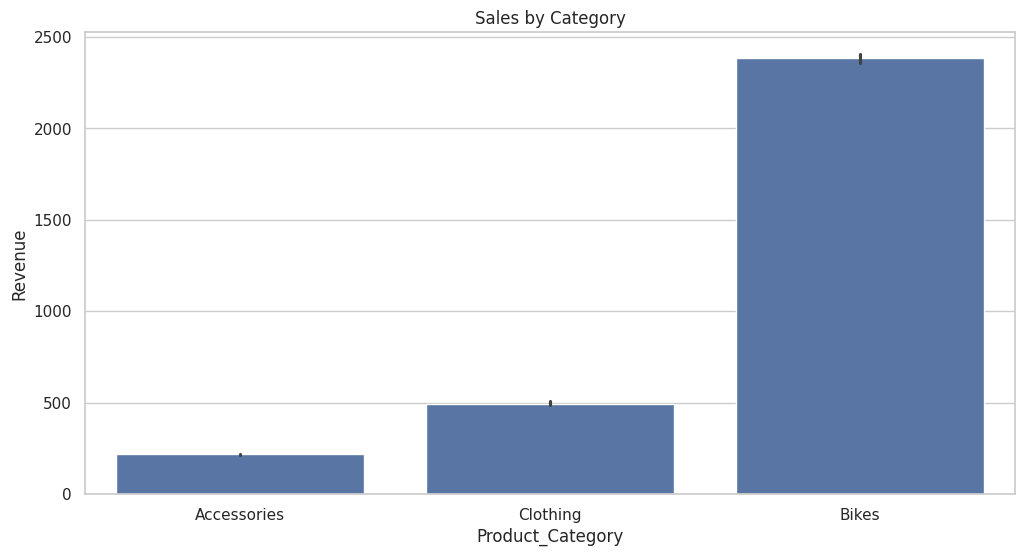

In [ ]:
# 2. Data Cleaning
# Remove duplicates
df.drop_duplicates(inplace=True)

# Fill missing values with mean for numerical columns
df.fillna(df.mean(numeric_only=True), inplace=True)

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# 3. Exploratory Data Analysis
sns.set(style="whitegrid")

# Time series plot for Sales
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['Date'], y=df['Revenue'])
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

# Scatter plot: Profit vs. Discount
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Cost'], y=df['Profit'])
plt.title("Profit vs. Cost")
plt.xlabel("Cost")
plt.ylabel("Profit")
plt.show()


plt.figure(figsize=(12, 6))
sns.barplot(x="Product_Category", y="Revenue", data=df)
plt.title("Sales by Category")
plt.show()


In [12]:
# 4. Predictive Modeling
# Selecting features and target
X = df[["Profit", "Cost"]]
y = df["Revenue"]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 7.708403657920053e-25
